In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import librosa.display
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Data/features_3_sec.csv')

In [18]:
df.shape

(9990, 60)

In [19]:
df['tags'] = df['filename'].str.split('.').str[1]

In [20]:
df['tags1'] = df['filename'].str.split('.').str[0]

In [21]:
df['tags'].value_counts()

,count
tags,
00000,100
00075,100
00073,100
00072,100
00071,100
...,...
00038,99
00032,99
00031,99


In [22]:
df.loc[(df['tags'] == '00002') & (df['tags1'] == 'blues')]

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,tags,tags1
20,blues.00002.0.wav,66149,0.366614,0.090509,0.152206,0.002467,1676.978191,433761.847841,1794.856236,56792.982500,...,44.652466,-2.819872,50.686920,-2.062507,38.493343,-4.214690,23.373898,blues,00002,blues
21,blues.00002.1.wav,66149,0.384461,0.084645,0.167405,0.001362,1337.448514,69939.396509,1658.057449,50969.919105,...,65.734543,-0.409954,47.267921,-1.283557,51.049812,-0.642756,27.588282,blues,00002,blues
22,blues.00002.2.wav,66149,0.379043,0.086581,0.176237,0.001924,1590.857591,153760.844757,1779.645051,79475.879079,...,44.407555,-3.105310,40.462624,-4.471606,46.745087,-1.416849,35.118946,blues,00002,blues
23,blues.00002.3.wav,66149,0.397078,0.080919,0.177723,0.001808,1436.270424,98276.302728,1690.135527,55831.185712,...,49.576012,2.942567,28.540144,-0.360661,54.554077,-1.046457,27.857132,blues,00002,blues
24,blues.00002.4.wav,66149,0.360683,0.088624,0.183903,0.001507,1540.099772,145972.646462,1726.643189,65111.550643,...,34.864491,-2.013198,24.143799,-4.399901,32.495110,-3.156466,38.718266,blues,00002,blues
25,blues.00002.5.wav,66149,0.364035,0.088116,0.152364,0.001923,1594.920885,260781.775496,1730.746723,113020.010243,...,46.145531,-2.628009,53.689621,-2.401809,59.490814,-0.967632,32.147289,blues,00002,blues
26,blues.00002.6.wav,66149,0.299589,0.083030,0.170790,0.001917,1396.794527,81945.617374,1517.311972,92242.679953,...,41.892445,-6.356915,48.576363,-7.920033,24.511488,-0.412127,22.517632,blues,00002,blues
27,blues.00002.7.wav,66149,0.361508,0.079471,0.190943,0.003116,1549.572759,47057.458331,1788.919219,45072.259662,...,39.133656,0.860312,79.191307,-5.330613,42.226936,1.075333,22.927328,blues,00002,blues
28,blues.00002.8.wav,66149,0.334331,0.081312,0.196997,0.003942,1704.564643,75336.469181,1880.313683,46849.145321,...,58.522827,2.397915,65.363472,-6.671227,38.077599,-2.200269,30.644648,blues,00002,blues
29,blues.00002.9.wav,66149,0.391811,0.078529,0.187923,0.005516,1673.364389,68382.596855,1893.572151,47306.278227,...,24.065565,2.025056,20.160931,-6.556604,29.323061,-1.891574,35.834270,blues,00002,blues


In [23]:
save_for_analysis = df.loc[(df['tags'] == '00002') & (df['tags1'] == 'blues')]['chroma_stft_mean']

# Lets drop some unecessary features.

In [24]:
df.drop(['filename','tags'],axis =1 ,inplace = True)

In [25]:
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,tags1
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues,blues


# Let's visualize the dataset and understand our data better.

There are 8 main genres with 1000 sub-classes per
genre, such as Electronic, Experimental, Folk, Hip-hop, Instrumental, International,
Pop, Rock. And most of them are with sampling rate of 44,100 Hz, bit rate 320 kb/s,
and in stereo. The GTZAN dataset consists of 1000 audio tracks of 30 seconds long,
which contains 10 genres with 100 tracks per genre. All tracks are 22,050Hz, Mono
16-bit audio files in .wav format (Sturm, 2013).

In [26]:
# It returns
# y : np.ndarray [shape=(n,) or (..., n)]
#    audio time series. Multi-channel is supported.
#sr : number > 0 [scalar]
#   sampling rate of ``y``

rec_file = '/content/drive/MyDrive/datasets/Data/genres_original/metal/metal.00002.wav'
data,sr = librosa.load(rec_file)

In [27]:
librosa.load(rec_file,sr=44100) # Opening in sample rate of 44100

(array([-0.02418417, -0.06673812, -0.10933091, ...,  0.08139706,
         0.08139443,  0.04712037], dtype=float32),
 44100)

In [28]:
import IPython
IPython.display.Audio(data,rate = sr)

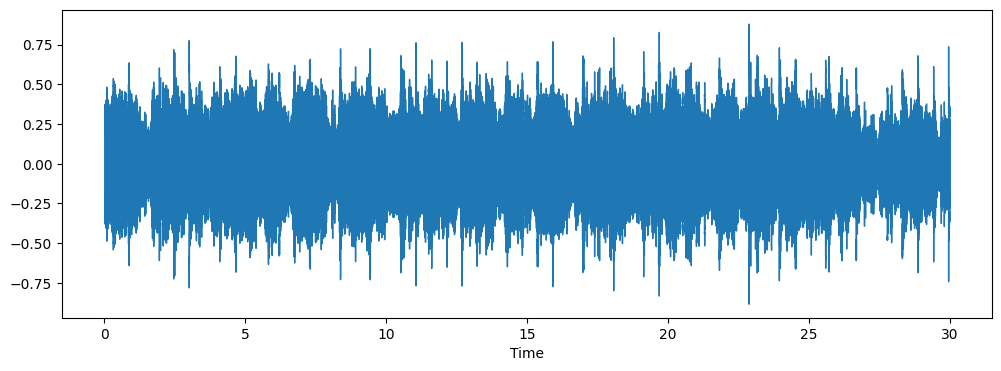

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
librosa.display.waveshow(data)

# Lets Create A spectogram

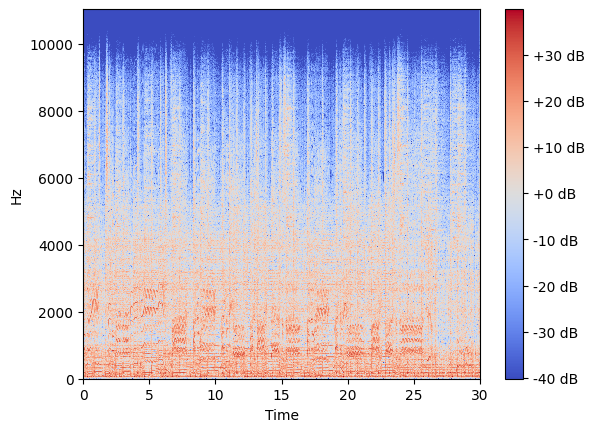

In [30]:
# By converting to decibels (dB) the scale becomes logarithmic.
#This limits the numerical range, to something like 0-120 dB instead.
#The intensity of colors when this is plotted corresponds more closely to what we hear than if one used a linear scale.
n_fft = 2048
hop_length = 512
stft = librosa.stft(data,n_fft=2048,hop_length = 512)
stft_db = librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(data = stft_db,sr = 22050, x_axis = 'time', y_axis = 'hz')
plt.colorbar(format="%+2.f dB")

The vertical axis represents frequencies (from 0 to 10kHz), and the horizontal axis represents the time of the clip.

# Rolloff - fequency
Its a frequency below which a specified percentage of the total spectral lies / 85%


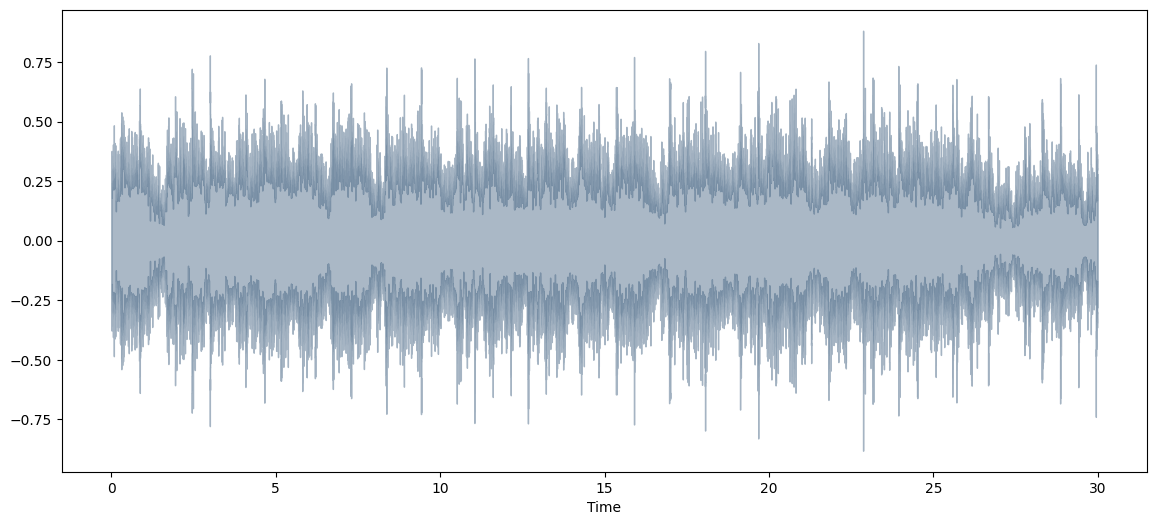

In [31]:
from sklearn.preprocessing import normalize

spectral_rolloff = librosa.feature.spectral_rolloff(y=data + 0.01, sr=sr)[0]

plt.figure(figsize=(14, 6))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#2B4F72")


# Chroma Feature.
It is a powerful tool for analyzing music features whose pitches can be meaningfully categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation.

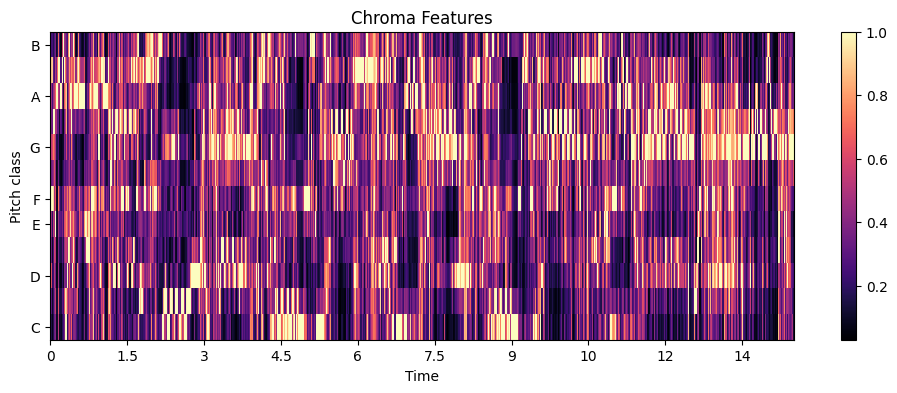

In [32]:
plt.figure(figsize=(12, 4))

# Pass 'y' explicitly instead of using positional argument
chroma = librosa.feature.chroma_stft(y=data, sr=45600)

# Ensure 'sr' is correctly passed in specshow()
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=45600)

plt.colorbar()
plt.title("Chroma Features")
plt.show()


In [33]:
chroma.mean()

0.45531145

# MFCC Extraction

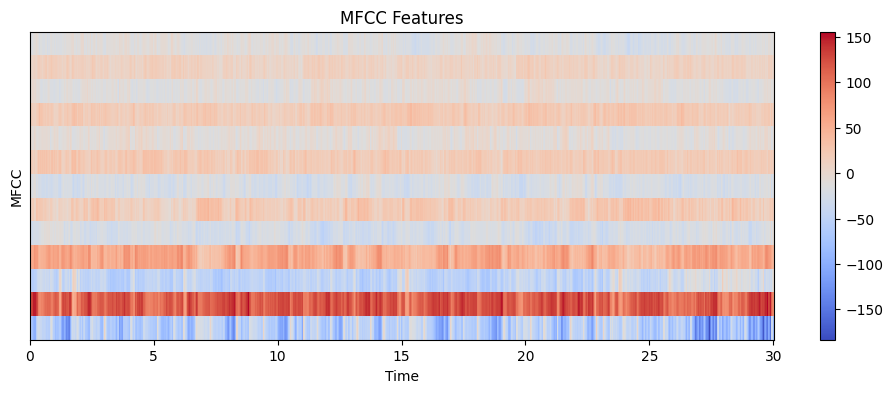

In [34]:
plt.figure(figsize=(12, 4))

# Use 'y=data' instead of passing 'data' as a positional argument
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# Ensure correct parameter usage in specshow()
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length, x_axis="time")

plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.title("MFCC Features")
plt.show()


In [35]:
import os

# Use raw string or forward slashes for correct path handling
path = r"/content/drive/MyDrive/datasets/Data/genres_original"

# Verify if path exists
if not os.path.exists(path):
    print(f"Error: Path '{path}' does not exist!")
else:
    filenames_all = []
    labels = []

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(path)):
        if dirpath != path:
            filenames_all.append(filenames)
            labels.append(len(filenames_all[i-1]) * [i-1])

    print(f"Total directories found: {len(filenames_all)}")

    # Ensure there's data before accessing indices
    if filenames_all and filenames_all[0]:
        i = 0
        j = 0
        print(filenames_all[i][j])
    else:
        print("Error: No files found in any subdirectory!")


Total directories found: 10
blues.00002.wav


In [36]:
i = 0
j = 0
filenames_all[i][j]

'blues.00002.wav'

In [37]:
import math
import librosa
import json
import os

SAMPLE_RATE = 22050
TRACK_DURATION = 30  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath != dataset_path:
            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = os.path.basename(dirpath)  # Use os.path.basename for cross-platform compatibility
            data["mapping"].append(semantic_label)

            # process all audio files in genre sub-dir
            for f in filenames:
                file_path = os.path.join(dirpath, f)

                # Load audio file
                try:
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue  # Skip corrupted files

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc (Fix: use y=signal)
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate,
                                                n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T  # Transpose to align features properly

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i - 1)  # Assign label

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


save_mfcc(dataset_path='/content/drive/MyDrive/datasets/Data/genres_original', json_path='data.json')


Error loading /content/drive/MyDrive/datasets/Data/genres_original/jazz/jazz.00054.wav: 


In [38]:
import json
with open('data.json') as fp:
        data = json.load(fp)
        X = np.array(data['mfcc'])
        y = np.array(data['labels'])

In [ ]:
set(y) # These are unique values
#0-> Blues
#1-> classical
#2-> country
#3-> disco
#4-> hiphop
#5-> jazz
#6-> metal
#7-> pop
#8-> reggae
#9-> rock

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [141]:

# splitting the data into Train and Test sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# Building the CNN
from tensorflow import keras
model = keras.Sequential(
    [   # Input
        keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),
        # Hidden
        keras.layers.Dense(512, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        # Dropout to reduce overfitting.
        keras.layers.Dropout(0.3),
        # Hidden
        keras.layers.Dense(256, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        # Hidden
        keras.layers.Dense(64, activation = "relu", kernel_regularizer = keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # Ouput
        keras.layers.Dense(10,activation = "softmax")
    ]
)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
              )
model.fit(X_train,y_train,
          validation_data = (X_test,y_test),
          epochs = 50,
          batch_size = 32)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.1470 - loss: 56.3622 - val_accuracy: 0.2690 - val_loss: 4.4709
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.1799 - loss: 11.9481 - val_accuracy: 0.2951 - val_loss: 3.5939
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.1999 - loss: 6.8657 - val_accuracy: 0.2517 - val_loss: 3.4915
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.2014 - loss: 5.1779 - val_accuracy: 0.2557 - val_loss: 3.4992
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.1778 - loss: 4.3549 - val_accuracy: 0.2517 - val_loss: 3.4829
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.2073 - loss: 3.8836 - val_accuracy: 0.2724 - val_loss: 3.4155
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2232 - loss: 3.8023 - val_accuracy: 0.2917 - val_loss: 3.3805
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.2197 - loss: 3.6738 - val_

**ANN** was not giving a good accuracy so let's see if we can use **CNN** for our project. For a CNN we will use mfcc spectogram 2-d array as it will be required for cnn to train as cnn will be able to extract features better  we can extract features which look like images and shape them in a way in order to feed them into a CNN.

In [46]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from tensorflow import keras
# ---------------------------
# 1. Load and Preprocess the Dataset
# ---------------------------

# Load MFCCs and labels from a JSON file
with open('data.json', 'r') as fp:
    data = json.load(fp)


In [47]:

# 'mfcc' should be a list (or nested lists) representing the MFCC features
# and 'labels' should be the corresponding integer labels.
X = np.array(data['mfcc'])  # Expected shape: (num_samples, time_steps, n_mfcc)
y = np.array(data['labels'])

# For scaling purposes we need to reshape the 3D input to 2D.
num_samples, time_steps, n_mfcc = X.shape
X_reshaped = X.reshape(num_samples, -1)  # Now shape is (num_samples, time_steps * n_mfcc)

# Create a DataFrame from the flattened inputs
df_inputs = pd.DataFrame(X_reshaped)

# Create and fit a MaxAbsScaler to scale each feature between -1 and 1
abs_scaler = MaxAbsScaler()
abs_scaler.fit(df_inputs)

# Transform the data using the fitted scaler
scaled_data = abs_scaler.transform(df_inputs)

# (Optional) Store the scaled data in a DataFrame and visualize the first few rows
df_scaled_input = pd.DataFrame(scaled_data, columns=df_inputs.columns)
print("Scaled data preview:\n", df_scaled_input.head())

# Reshape the scaled data back to its original 3D shape
X_scaled = df_scaled_input.values.reshape(num_samples, time_steps, n_mfcc)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


Scaled data preview:
        0         1         2         3         4         5         6     \
0 -0.133334  0.666517 -0.476844  0.131796 -0.021616  0.606453 -0.083600   
1 -0.210749  0.645689 -0.206699  0.319562 -0.148589  0.460388  0.090465   
2 -0.316385  0.750491  0.376433  0.426898 -0.464809  0.241961  0.029139   
3 -0.154394  0.574477  0.022260  0.247755  0.114398  0.217948  0.011254   
4 -0.041077  0.635433 -0.349772  0.170529 -0.404476  0.419789 -0.172879   

       7         8         9     ...      3357      3358      3359      3360  \
0  0.180068 -0.336592  0.114391  ...  0.377618  0.416923  0.408225  0.287140   
1  0.455011 -0.171193  0.313584  ...  0.392983 -0.394478  0.221434  0.050750   
2  0.193033  0.200712  0.140802  ...  0.406773  0.054328  0.299319 -0.196435   
3 -0.174278  0.030320  0.175894  ...  0.200361 -0.295243  0.347544 -0.318129   
4  0.098981 -0.084456  0.286388  ...  0.150423  0.231888  0.191738 -0.123339   

       3361      3362      3363      3364     

In [48]:
# ---------------------------
# 2. Build the Neural Network Model
# ---------------------------
# Define an L2 regularization factor (adjust as needed)
l2_reg = keras.regularizers.l2(1e-4)

# Build the model using a Flatten layer (to convert 2D MFCC input into 1D)
# followed by Dense layers with ReLU activations and Dropout layers to help prevent overfitting.
model = keras.Sequential([
    # Input layer: Flatten the (time_steps, n_mfcc) MFCC input
    keras.layers.Flatten(input_shape=(time_steps, n_mfcc)),

    # Hidden Layer 1: 512 neurons, ReLU, L2 regularization, and Dropout
    keras.layers.Dense(512, activation="relu", kernel_regularizer=l2_reg),
    keras.layers.Dropout(rate=0.3),

    # Hidden Layer 2: 256 neurons
    keras.layers.Dense(256, activation="relu", kernel_regularizer=l2_reg),
    keras.layers.Dropout(rate=0.3),

    # Hidden Layer 3: 64 neurons
    keras.layers.Dense(64, activation="relu", kernel_regularizer=l2_reg),
    keras.layers.Dropout(rate=0.3),

    # Output Layer: 10 neurons (assuming 10 classes) with softmax activation
    keras.layers.Dense(10, activation="softmax")
])

In [49]:
# Compile the model
# - Adam optimizer is chosen for its efficiency.
# - clipnorm=1 prevents exploding gradients.
# - Sparse categorical crossentropy is used since our targets are integer labels.
optimizer = keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3367)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,724,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,872,842 (7.14 MB)

 Trainable params: 1,872,842 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# ---------------------------
# 3. Train the Model with Early Stopping
# ---------------------------
# Early stopping will monitor the validation loss and stop training
# if no improvement is seen after 7 epochs (patience), restoring the best weights.
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=128,  # Mini-batch training is a good compromise between speed and accuracy.
    callbacks=[early_stop]
)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7560 - loss: 0.9285 - val_accuracy: 0.5734 - val_loss: 1.3872
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7716 - loss: 0.8698 - val_accuracy: 0.5794 - val_loss: 1.3785
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7626 - loss: 0.8721 - val_accuracy: 0.5841 - val_loss: 1.3798
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7712 - loss: 0.8333 - val_accuracy: 0.5748 - val_loss: 1.3779
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.7771 - loss: 0.8591 - val_accuracy: 0.5828 - val_loss: 1.3994
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7953 - loss: 0.7866 - val_accuracy: 0.5901 - val_loss: 1.3758
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7958 - loss: 0.7953 - val_accuracy: 0.5841 - val_loss: 1.3926
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8163 - loss: 0.7435 - val_accuracy: 0.5814 - 

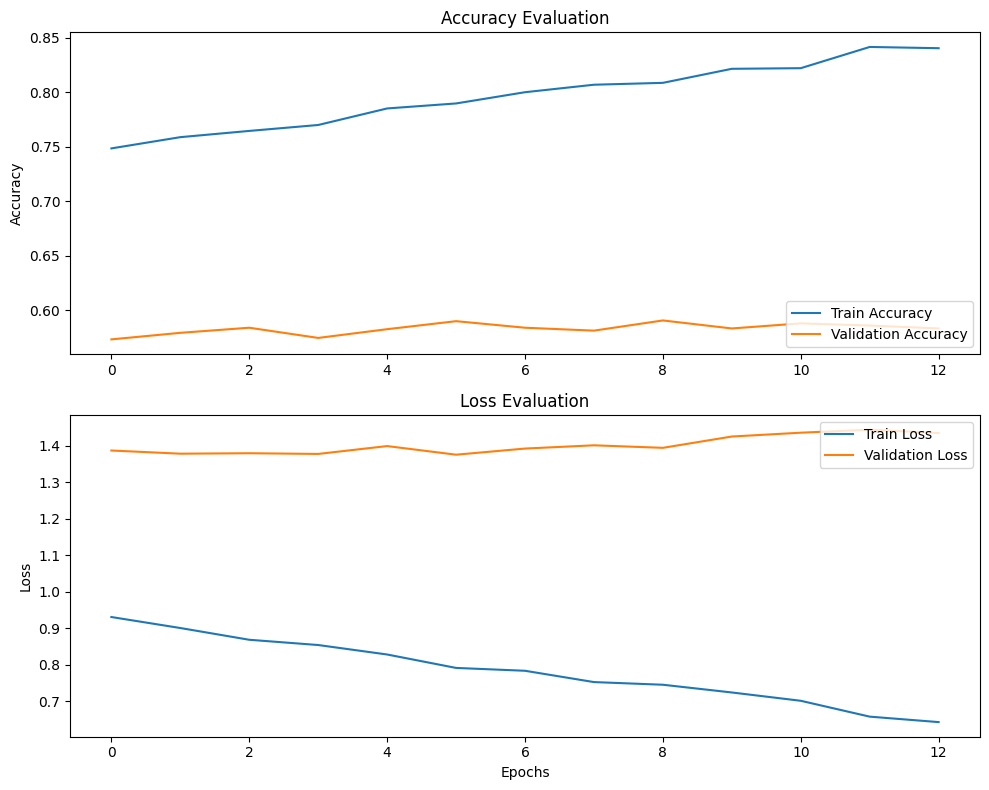

In [57]:
# ---------------------------
# 4. Visualize Training History
# ---------------------------
def plot_history(history):
    fig, axis = plt.subplots(2, 1, figsize=(10, 8))

    # Accuracy subplot
    axis[0].plot(history.history["accuracy"], label="Train Accuracy")
    axis[0].plot(history.history["val_accuracy"], label="Validation Accuracy")
    axis[0].set_ylabel("Accuracy")
    axis[0].set_title("Accuracy Evaluation")
    axis[0].legend(loc="lower right")

    # Loss subplot
    axis[1].plot(history.history["loss"], label="Train Loss")
    axis[1].plot(history.history["val_loss"], label="Validation Loss")
    axis[1].set_ylabel("Loss")
    axis[1].set_xlabel("Epochs")
    axis[1].set_title("Loss Evaluation")
    axis[1].legend(loc="upper right")

    plt.tight_layout()
    plt.show()

plot_history(history)

In [58]:
# ---------------------------
# 5. Evaluate the Model
# ---------------------------

# Evaluate the model on the test set and retrieve the loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optionally, generate predictions and further analyze performance:
# predictions = model.predict(X_test)
# predicted_labels = np.argmax(predictions, axis=1)
# You could then use sklearn.metrics (e.g., confusion_matrix, classification_report) for more insights.


Test Loss: 1.3758
Test Accuracy: 0.5901


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


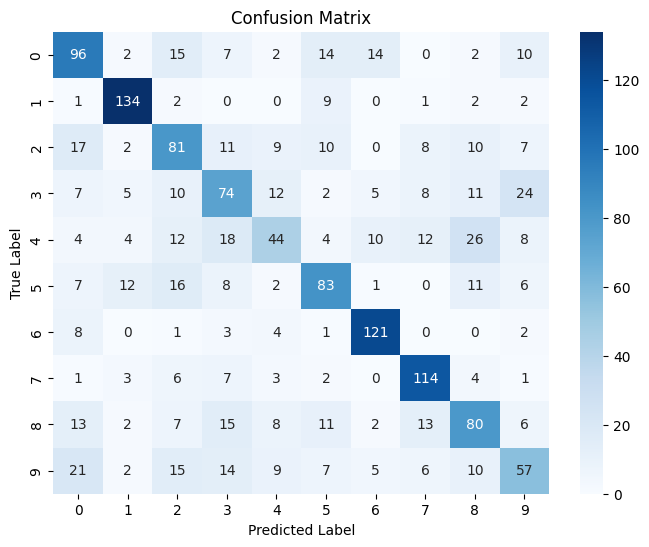

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       162
           1       0.81      0.89      0.85       151
           2       0.49      0.52      0.51       155
           3       0.47      0.47      0.47       158
           4       0.47      0.31      0.37       142
           5       0.58      0.57      0.57       146
           6       0.77      0.86      0.81       140
           7       0.70      0.81      0.75       141
           8       0.51      0.51      0.51       157
           9       0.46      0.39      0.42       146

    accuracy                           0.59      1498
   macro avg       0.58      0.59      0.58      1498
weighted avg       0.58      0.59      0.58      1498



In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Detailed classification report
print(classification_report(y_test, predicted_labels))


***And the answer is yes it's predicting properly*** Now lets start working on deploying this whole model.

# What else we could have done ?
1. Right now we are only using mfcc we can also use chroma values
2. We can also use other params like rollof frequency for our dataset creation but and with that our data would become big and would give our model more information

Lets now go ahead and save our model and create a function to extract mfcc features from new audio file.

In [65]:
# 2. Save the entire model to Google Drive
model.save('/content/drive/MyDrive/music-gen-classify-v1.h5')

# 3. Later, load the model from Google Drive
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/music-gen-classify-v1.h5')

# Optionally, evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded Model - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Loaded Model - Test Loss: 1.3758, Test Accuracy: 0.5901


In [67]:
from tensorflow import keras
new_model = keras.models.load_model('/content/drive/MyDrive/music-gen-classify-v1.h5')

In [80]:
# Suppose you have extracted MFCCs for your new audio and got an array of shape (32, 13)
# For demonstration, we'll simulate an MFCC array:
mfcc_sample = np.random.rand(32, 13)  # Replace this with your actual MFCC extraction


In [81]:
def pad_truncate_mfcc(mfcc, target_length=259):
    current_length = mfcc.shape[0]
    if current_length > target_length:
        return mfcc[:target_length, :]
    elif current_length < target_length:
        pad_width = target_length - current_length
        mfcc_padded = np.pad(mfcc, pad_width=((0, pad_width), (0, 0)), mode='constant')
        return mfcc_padded
    else:
        return mfcc

# Adjust the MFCC sample to match the expected shape (259, 13)
mfcc_fixed = pad_truncate_mfcc(mfcc_sample, target_length=259)



In [82]:
# Add a batch dimension: final shape should be (1, 259, 13)
X_predict = np.expand_dims(mfcc_fixed, axis=0)

# Now make predictions
pred = new_model.predict(X_predict)
predicted_class = np.argmax(pred, axis=1)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Predicted class: [7]


So we are getting good accuracy and let's start building our application using Streamlit.